# Laporan Proyek Machine Learning - Aryaputra Maheswara

---

## Project Overview

---

Anime merupakan salah satu bentuk hiburan yang sangat populer di berbagai kalangan, baik anak-anak, remaja, maupun dewasa. Sebagai medium seni visual yang menggabungkan cerita mendalam, visual yang menawan, dan musik yang memikat, anime memiliki daya tarik yang kuat bagi para penggemarnya. Namun, seiring dengan pertumbuhan industri anime, jumlah judul yang tersedia di berbagai platform semakin meningkat, menciptakan tantangan bagi pengguna dalam menemukan anime yang sesuai dengan preferensi mereka.

Rekomendasi anime menjadi solusi untuk membantu pengguna menemukan anime yang relevan dengan minat mereka. Teknologi modern, seperti sistem rekomendasi berbasis kecerdasan buatan, memungkinkan pengalaman yang lebih personal dalam memilih anime. Salah satu metode yang dapat digunakan adalah content-based filtering, yang memanfaatkan data dari fitur atau karakteristik anime untuk menemukan kesamaan antara satu anime dengan yang lain.

#### Mengapa Proyek Ini Perlu Diselesaikan?
1. Pertumbuhan Industri Anime: Ukuran pasar global anime diperkirakan mencapai USD 31,23 miliar pada tahun 2023 dan diproyeksikan tumbuh dengan laju tahunan gabungan (CAGR) sebesar 9,8% dari tahun 2024 hingga 2030. Permintaan yang terus meningkat terhadap konten anime Jepang, distribusi berbasis internet, serta aplikasi game menjadi pendorong utama ekspansi pasar ini [Anime Market Size, Share, Growth And Trends Report, 2024](https://www.who.int/news-room/fact-sheets/detail/diabetes) [1].
2. Kepuasan Pengguna: Pengalaman pengguna sangat dipengaruhi oleh relevansi konten yang direkomendasikan. Studi menunjukkan bahwa algoritma berbasis konten dapat meningkatkan personalisasi dan kepuasan pengguna [2].
3. Efisiensi dalam Penemuan Konten: Tanpa sistem rekomendasi yang efisien, pengguna sering kali menghabiskan waktu yang lama untuk mencari anime yang mereka sukai, yang dapat menurunkan tingkat keterlibatan mereka [3].
4. Pemanfaatan Data yang Tersedia: Data deskriptif seperti genre, deskripsi, dan karakteristik anime lainnya dapat dimanfaatkan untuk menghasilkan rekomendasi yang akurat [4].

## Business Understanding

---

### Problem Statement

* Apa genre anime yang paling populer di seluruh kalangan?
* Anime apa yang paling populer dan disukai di dalam data tersebut?
* Apakah ada hubungan antar variabel pada dataset yang data diintepretasikan?
* Bagaimana cara membuat sistem rekomendasi anime?

### Goals

* Mengetahui genre anime yang paling populer serta mencari hubungan antar variabel yang berkaitan dengan anime
* Membuat sistem rekomendasi yang dapat merekomendasikan anime yang relevan
* Menggunakan algoritma cosine similarity untuk membuat sistem rekomendasi, lalu mengevaluasi menggunakan metriks precission untuk menjamin keakuratan sistem rekomendasi.

### Solution Approach

* Mengimplementasikan Exploratory Data Analysis (EDA) untuk analisis dan visualisasi data.
* Mengimplementasikan content-based filtering approach menggunakan algoritma cosine similarity.

## Data Loading

In [1]:
import os
import zipfile

import pandas as pd
import numpy as np

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from scipy.sparse import hstack

import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('mode.chained_assignment', None)  # Disable warning

In [2]:
exists = os.path.exists('anime-recommendation-database-2020.zip')
if not exists:
    !kaggle datasets download hernan4444/anime-recommendation-database-2020
else:
    print('Dataset is downloaded!')

Dataset is downloaded!


In [3]:

exists = os.path.exists('anime.csv')
if not exists:
    with zipfile.ZipFile('anime-recommendation-database-2020.zip', 'r') as zip_ref:
        zip_ref.extractall()
else:
    print('Data is extracted!')

Data is extracted!


In [4]:
anime = pd.read_csv('anime.csv')
anime_sinopsis = pd.read_csv('anime_with_synopsis.csv')


# Data Understanding

Dataset yang digunakan adalah data Anime yang tersedia pada website kaggle yang dapat di akses pada link [Berikut ini](https://www.kaggle.com/datasets/iammustafatz/diabetes-prediction-dataset), dataset ini berisi data Anime yang di scarping pada website MyAnimeList di tahun 2020 dengan jumlah baris dan kolom sebanyak 17562 baris dan 35 kolom untuk anime.csv dan 16214 baris dan 5 kolom untuk anime_with_synopsis.csv.

In [5]:
anime.shape

(17562, 35)

Dataset anime.csv berisi memiliki 35 variabel dengan keterangan sebagai berikut :

| Variabel | Keterangan |
|----------|------------|
| MAL_ID |  ID Anime yang tersimpan pada MyAnimeList (e.g. 1)|
| Name | Nama lengkap dari anime |
| Score | Rata-rata skor anime yang diberikan oleh user MyAnimeList. (e.g 8,78) |
| Genres | List dari genre yang ada pada 1 judul anime yang dipisahkan oleh koma (e.g Action, Comedy, Drama) |
| English name | Judul anime dalam bahasa inggris |
| Japanese name | Judul anime dalam bahasa Jepang |
| Type | Tipe anime (e.g TV, Movie, OVA) |
| Episodes | Jumlah episode |
| Aired | Tanggal Penayangan (e.g. Apr 3, 1998 to Apr 24, 1999) |
| Premiered | Musim tayang (e.g Spring 1998) |
| Produces | List dari produser anime |
| Licensors | List dari pemberi lisensi anime |
| Studios | List dari studio anime |
| Source | Sumber dari anime (e.g Manga) |
| Duration | Durasi anime per episode (e.g 24 min. per ep.) |
| Rating | Rating umur (e.g. R - 17+ (violence & profanity)) |
| Ranked | Posisi anime berdasarkan skor |
| Popularity | Posisi berdasarkan jumlah user yang menyimpan anime ke dalam list mereka |
| Members | Jumlah member komunitas yang ada pada grup anime ini |
| Favorites | Jumlah user yang menandai anime sebagai favorite |
| Watching | Jumlah user yang sedang menonton anime |
| Completed | Jumlah user yang telah menamatkan anime |
| On-Hold | Jumlah user yang menunda menonton anime |
| Dropped | Jumlah user yang tidak melanjutkan menonton anime |
| Plan to Watch | Jumlah user yang berencana menonton anime |
| Score-10 | Jumlah user yang memberikan skor 10 |
| Score-9 | Jumlah user yang memberikan skor 9 |
| Score-8 | Jumlah user yang memberikan skor 8 |
| Score-7 | Jumlah user yang memberikan skor 7 |
| Score-6 | Jumlah user yang memberikan skor 6 |
| Score-5 | Jumlah user yang memberikan skor 5 |
| Score-4 | Jumlah user yang memberikan skor 4 |
| Score-3 | Jumlah user yang memberikan skor 3 |
| Score-2 | Jumlah user yang memberikan skor 2 |
| Score-1 | Jumlah user yang memberikan skor 1 |

In [6]:
anime_sinopsis.shape

(16214, 5)

Dataset anime_with_synopsis.csv berisi memiliki 5 variabel dengan keterangan sebagai berikut :

| Variabel | Keterangan |
|----------|------------|
| MAL_ID |  ID Anime yang tersimpan pada MyAnimeList (e.g. 1)|
| Name | Nama lengkap dari anime |
| Score | Rata-rata skor anime yang diberikan oleh user MyAnimeList. (e.g 8,78) |
| Genres | List dari genre yang ada pada 1 judul anime yang dipisahkan oleh koma (e.g Action, Comedy, Drama) |
| sypnopsis | Sinopsis dari anime |

## Exploratory Data Analysis

In [7]:
anime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17562 entries, 0 to 17561
Data columns (total 35 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MAL_ID         17562 non-null  int64 
 1   Name           17562 non-null  object
 2   Score          17562 non-null  object
 3   Genres         17562 non-null  object
 4   English name   17562 non-null  object
 5   Japanese name  17562 non-null  object
 6   Type           17562 non-null  object
 7   Episodes       17562 non-null  object
 8   Aired          17562 non-null  object
 9   Premiered      17562 non-null  object
 10  Producers      17562 non-null  object
 11  Licensors      17562 non-null  object
 12  Studios        17562 non-null  object
 13  Source         17562 non-null  object
 14  Duration       17562 non-null  object
 15  Rating         17562 non-null  object
 16  Ranked         17562 non-null  object
 17  Popularity     17562 non-null  int64 
 18  Members        17562 non-n

In [8]:
anime.describe()

,MAL_ID,Popularity,Members,Favorites,Watching,Completed,On-Hold,Dropped,Plan to Watch
count,17562.000000,17562.000000,1.756200e+04,17562.000000,17562.000000,1.756200e+04,17562.000000,17562.000000,17562.000000
mean,21477.192347,8763.452340,3.465854e+04,457.746270,2231.487758,2.209557e+04,955.049653,1176.599533,8199.831227
std,14900.093170,5059.327278,1.252821e+05,4063.473313,14046.688133,9.100919e+04,4275.675096,4740.348653,23777.691963
min,1.000000,0.000000,1.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000,1.000000
25%,5953.500000,4383.500000,3.360000e+02,0.000000,13.000000,1.110000e+02,6.000000,37.000000,112.000000
50%,22820.000000,8762.500000,2.065000e+03,3.000000,73.000000,8.175000e+02,45.000000,77.000000,752.500000
75%,35624.750000,13145.000000,1.322325e+04,31.000000,522.000000,6.478000e+03,291.750000,271.000000,4135.500000
max,48492.000000,17565.000000,2.589552e+06,183914.000000,887333.000000,2.182587e+06,187919.000000,174710.000000,425531.000000


Data anime :
1. MAL_ID memiliki 17562 data, tetapi ID maksimal mencapai 48492, artinya terdapat beberapa ID yang tidak ada pada dataset ini
2. Nilai Popularity, Favorites, Watching, Completed, On-Hold, Dropped minimum adalah nol, artinya data tersebut adalah missing value, karena nilai minimum seharusnya adalah 1

---

### Cek value Unknown

In [9]:
anime.isna().sum()

MAL_ID           0
Name             0
Score            0
Genres           0
English name     0
Japanese name    0
Type             0
Episodes         0
Aired            0
Premiered        0
Producers        0
Licensors        0
Studios          0
Source           0
Duration         0
Rating           0
Ranked           0
Popularity       0
Members          0
Favorites        0
Watching         0
Completed        0
On-Hold          0
Dropped          0
Plan to Watch    0
Score-10         0
Score-9          0
Score-8          0
Score-7          0
Score-6          0
Score-5          0
Score-4          0
Score-3          0
Score-2          0
Score-1          0
dtype: int64

Tidak ada data bernilai NULL

In [10]:
# Check for "Unknown" values in each column and count them
unknown_count = anime.apply(lambda col: col.isin(['Unknown']).sum())

print(unknown_count)

MAL_ID               0
Name                 0
Score             5141
Genres              63
English name     10565
Japanese name       48
Type                37
Episodes           516
Aired              309
Premiered        12817
Producers         7794
Licensors        13616
Studios           7079
Source            3567
Duration           555
Rating             688
Ranked            1762
Popularity           0
Members              0
Favorites            0
Watching             0
Completed            0
On-Hold              0
Dropped              0
Plan to Watch        0
Score-10           437
Score-9           3167
Score-8           1371
Score-7            503
Score-6            511
Score-5            584
Score-4            977
Score-3           1307
Score-2           1597
Score-1            459
dtype: int64


Data tidak ada yang bernilai null, tetapi ada cukup banyak data yang bernilai Unknown

### Top 10 Popular Anime

In [11]:
data_eda = anime[['MAL_ID','Name', 'Score', 'Type', 'Episodes', 'Rating', 'Genres', 'Ranked', 'Popularity', 'Favorites']]
data_popularity = data_eda[data_eda['Popularity'] >= 1]
data_popularity

,MAL_ID,Name,Score,Type,Episodes,Rating,Genres,Ranked,Popularity,Favorites
0,1,Cowboy Bebop,8.78,TV,26,R - 17+ (violence & profanity),"Action, Adventure, Comedy, Drama, Sci-Fi, Space",28.0,39,61971
1,5,Cowboy Bebop: Tengoku no Tobira,8.39,Movie,1,R - 17+ (violence & profanity),"Action, Drama, Mystery, Sci-Fi, Space",159.0,518,1174
2,6,Trigun,8.24,TV,26,PG-13 - Teens 13 or older,"Action, Sci-Fi, Adventure, Comedy, Drama, Shounen",266.0,201,12944
3,7,Witch Hunter Robin,7.27,TV,26,PG-13 - Teens 13 or older,"Action, Mystery, Police, Supernatural, Drama, ...",2481.0,1467,587
4,8,Bouken Ou Beet,6.98,TV,52,PG - Children,"Adventure, Fantasy, Shounen, Supernatural",3710.0,4369,18
...,...,...,...,...,...,...,...,...,...,...
17557,48481,Daomu Biji Zhi Qinling Shen Shu,Unknown,ONA,Unknown,Unknown,"Adventure, Mystery, Supernatural",Unknown,13116,6
17558,48483,Mieruko-chan,Unknown,TV,Unknown,Unknown,"Comedy, Horror, Supernatural",Unknown,17562,70
17559,48488,Higurashi no Naku Koro ni Sotsu,Unknown,TV,Unknown,R - 17+ (violence & profanity),"Mystery, Dementia, Horror, Psychological, Supe...",Unknown,17558,48
17560,48491,Yama no Susume: Next Summit,Unknown,TV,Unknown,PG-13 - Teens 13 or older,"Adventure, Slice of Life, Comedy",Unknown,17565,2


/tmp/ipykernel_144928/4105610896.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_10_popular_anime, x='Name', y='Popularity', palette='coolwarm')


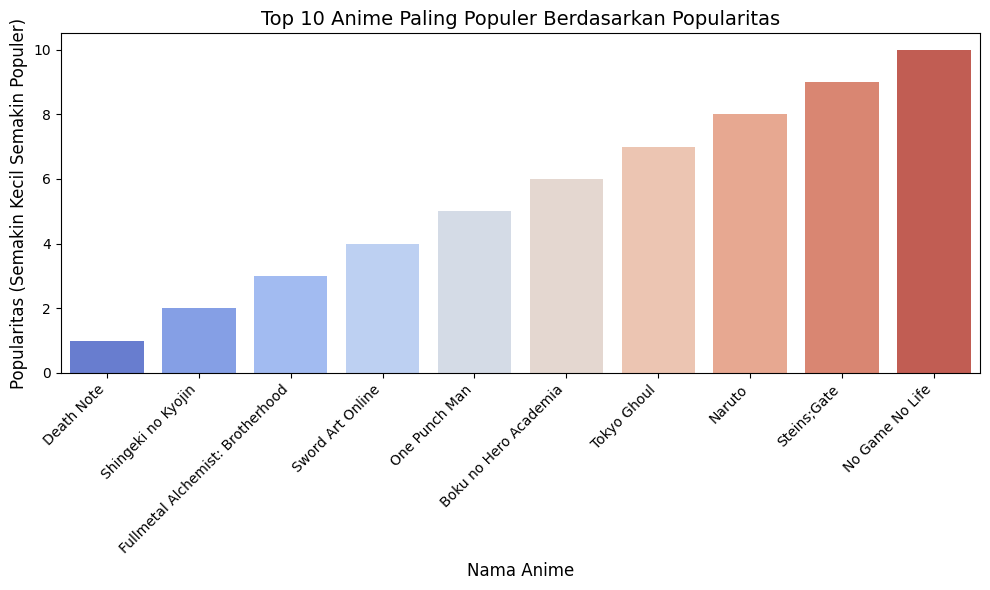

,MAL_ID,Name,Score,Type,Episodes,Rating,Genres,Ranked,Popularity,Favorites
1393,1535,Death Note,8.63,TV,37,R - 17+ (violence & profanity),"Mystery, Police, Psychological, Supernatural, ...",60.0,1,145201
7449,16498,Shingeki no Kyojin,8.48,TV,25,R - 17+ (violence & profanity),"Action, Military, Mystery, Super Power, Drama,...",115.0,2,129844
3971,5114,Fullmetal Alchemist: Brotherhood,9.19,TV,64,R - 17+ (violence & profanity),"Action, Military, Adventure, Comedy, Drama, Ma...",1.0,3,183914
6614,11757,Sword Art Online,7.25,TV,25,PG-13 - Teens 13 or older,"Action, Game, Adventure, Romance, Fantasy",2584.0,4,66342
10451,30276,One Punch Man,8.57,TV,12,R - 17+ (violence & profanity),"Action, Sci-Fi, Comedy, Parody, Super Power, S...",81.0,5,54435
11185,31964,Boku no Hero Academia,8.11,TV,13,PG-13 - Teens 13 or older,"Action, Comedy, School, Shounen, Super Power",400.0,6,50005
8646,22319,Tokyo Ghoul,7.81,TV,12,R - 17+ (violence & profanity),"Action, Mystery, Horror, Psychological, Supern...",807.0,7,45519
10,20,Naruto,7.91,TV,220,PG-13 - Teens 13 or older,"Action, Adventure, Comedy, Super Power, Martia...",660.0,8,65586
5683,9253,Steins;Gate,9.11,TV,24,PG-13 - Teens 13 or older,"Thriller, Sci-Fi",3.0,9,148452
8148,19815,No Game No Life,8.2,TV,12,PG-13 - Teens 13 or older,"Game, Adventure, Comedy, Supernatural, Ecchi, ...",304.0,10,45990


In [12]:
# Filter top 10 anime berdasarkan popularitas (nilai Popularity terkecil)
top_10_popular_anime = data_popularity.sort_values(by='Popularity', ascending=True).head(10)

# Visualisasi top 10 anime paling populer
plt.figure(figsize=(10, 6))
sns.barplot(data=top_10_popular_anime, x='Name', y='Popularity', palette='coolwarm')
plt.title('Top 10 Anime Paling Populer Berdasarkan Popularitas', fontsize=14)
plt.xlabel('Nama Anime', fontsize=12)
plt.ylabel('Popularitas (Semakin Kecil Semakin Populer)', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.tight_layout()
plt.show()

top_10_popular_anime

Anime paling populer pada tahun 2020 adalah anime Death Note dengan jumlah favorites sebanyak 145.201

/tmp/ipykernel_144928/1033551249.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_10_favorites_anime, x='Name', y='Favorites', palette='coolwarm')


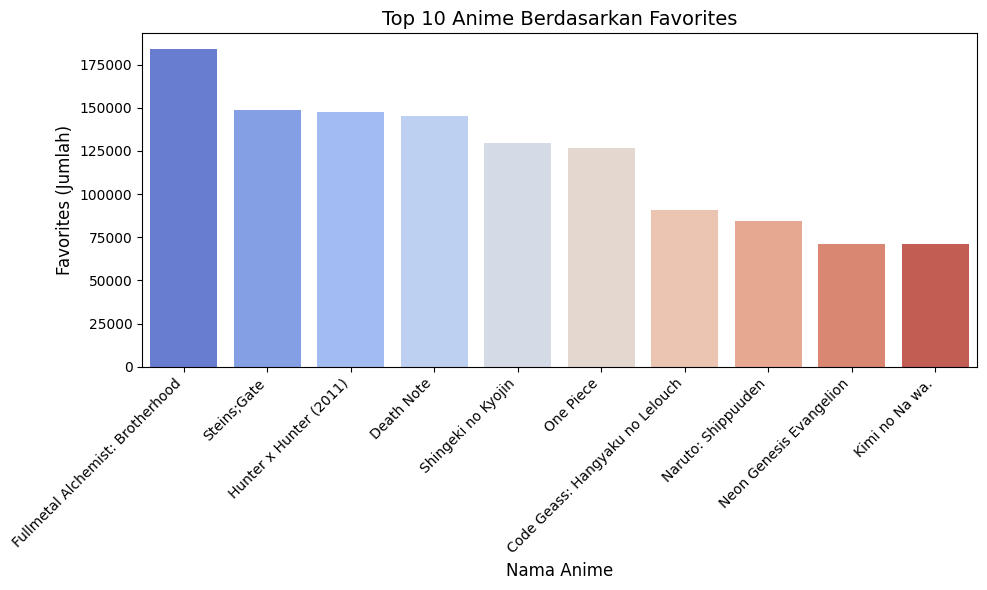

,MAL_ID,Name,Score,Type,Episodes,Rating,Genres,Ranked,Popularity,Favorites
3971,5114,Fullmetal Alchemist: Brotherhood,9.19,TV,64,R - 17+ (violence & profanity),"Action, Military, Adventure, Comedy, Drama, Ma...",1.0,3,183914
5683,9253,Steins;Gate,9.11,TV,24,PG-13 - Teens 13 or older,"Thriller, Sci-Fi",3.0,9,148452
6474,11061,Hunter x Hunter (2011),9.1,TV,148,PG-13 - Teens 13 or older,"Action, Adventure, Fantasy, Shounen, Super Power",6.0,12,147274
1393,1535,Death Note,8.63,TV,37,R - 17+ (violence & profanity),"Mystery, Police, Psychological, Supernatural, ...",60.0,1,145201
7449,16498,Shingeki no Kyojin,8.48,TV,25,R - 17+ (violence & profanity),"Action, Military, Mystery, Super Power, Drama,...",115.0,2,129844
11,21,One Piece,8.52,TV,Unknown,PG-13 - Teens 13 or older,"Action, Adventure, Comedy, Super Power, Drama,...",95.0,31,126645
1431,1575,Code Geass: Hangyaku no Lelouch,8.72,TV,25,R - 17+ (violence & profanity),"Action, Military, Sci-Fi, Super Power, Drama, ...",39.0,15,90487
1574,1735,Naruto: Shippuuden,8.16,TV,500,PG-13 - Teens 13 or older,"Action, Adventure, Comedy, Super Power, Martia...",345.0,18,84651
20,30,Neon Genesis Evangelion,8.32,TV,26,PG-13 - Teens 13 or older,"Action, Sci-Fi, Dementia, Psychological, Drama...",208.0,54,71308
11308,32281,Kimi no Na wa.,8.96,Movie,1,PG-13 - Teens 13 or older,"Romance, Supernatural, School, Drama",16.0,11,71054


In [13]:
# Urutkan berdasarkan Favorites dan ambil Top 10
top_10_favorites_anime = data_popularity.sort_values(by='Favorites', ascending=False).head(10)

# Visualisasi Top 10 berdasarkan Favorites
plt.figure(figsize=(10, 6))
sns.barplot(data=top_10_favorites_anime, x='Name', y='Favorites', palette='coolwarm')
plt.title('Top 10 Anime Berdasarkan Favorites', fontsize=14)
plt.xlabel('Nama Anime', fontsize=12)
plt.ylabel('Favorites (Jumlah)', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.tight_layout()
plt.show()

# Tampilkan data Top 10 Favorites
top_10_favorites_anime

Anime yang paling disukai pada tahun 2020 adalah Fullmetal Alchemist: Brotherhood	dengan jumlah favorites sebanyak 183.914

**Insights yang Dapat Diperoleh**
* Korelasi Popularitas dengan Favorites:

    Anime dengan nilai Favorites tinggi kemungkinan besar memiliki nilai Popularity kecil (sangat populer).
* Identifikasi Anime Ikonik:

    Anime dengan Favorites tertinggi biasanya dianggap ikonik atau memiliki komunitas penggemar yang besar.

---

### Data Cleaning

### Memvisualisasikan data yang kosong pada setiap fitur

Memilih fitur yang akan digunakan oleh model recommender system nantinya

In [14]:
data_anime = anime[['MAL_ID','Name', 'Score', 'Type', 'Episodes', 'Rating', 'Genres']].copy()
data_anime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17562 entries, 0 to 17561
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   MAL_ID    17562 non-null  int64 
 1   Name      17562 non-null  object
 2   Score     17562 non-null  object
 3   Type      17562 non-null  object
 4   Episodes  17562 non-null  object
 5   Rating    17562 non-null  object
 6   Genres    17562 non-null  object
dtypes: int64(1), object(6)
memory usage: 960.5+ KB


In [15]:
data_anime.isna().sum()

MAL_ID      0
Name        0
Score       0
Type        0
Episodes    0
Rating      0
Genres      0
dtype: int64

In [16]:
data_anime.duplicated().sum()

0

In [17]:
data_anime['MAL_ID'].nunique()

17562

Seluruh data MAL_ID sudah unik dan tidak ada yang duplikat

MAL_ID         0
Name           0
Score       5141
Type          37
Episodes     516
Rating       688
Genres        63
dtype: int64


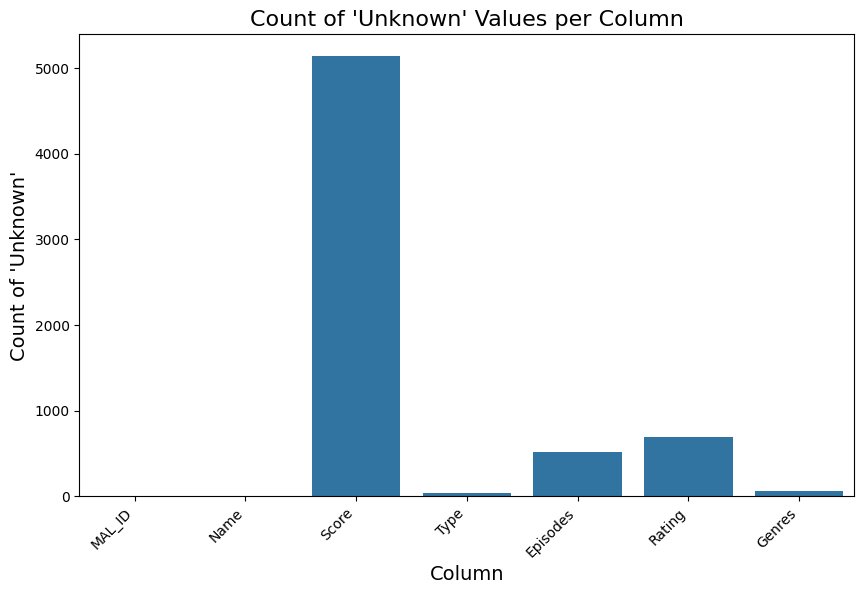

In [18]:
unknown_count = data_anime.apply(lambda col: col.isin(['Unknown']).sum())

print(unknown_count)

# Visualization
plt.figure(figsize=(10, 6))
sns.barplot(x=unknown_count.index, y=unknown_count.values)
plt.title("Count of 'Unknown' Values per Column", fontsize=16)
plt.xlabel("Column", fontsize=14)
plt.ylabel("Count of 'Unknown'", fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.show()

drop data yang bernilai unknown

In [19]:
# Drop rows with 'Unknown' values
data_anime_cleaned = data_anime.loc[~data_anime.isin(['Unknown']).any(axis=1)]

# Display the cleaned DataFrame
data_anime_cleaned = data_anime_cleaned.reset_index(drop=True)
data_anime_cleaned

,MAL_ID,Name,Score,Type,Episodes,Rating,Genres
0,1,Cowboy Bebop,8.78,TV,26,R - 17+ (violence & profanity),"Action, Adventure, Comedy, Drama, Sci-Fi, Space"
1,5,Cowboy Bebop: Tengoku no Tobira,8.39,Movie,1,R - 17+ (violence & profanity),"Action, Drama, Mystery, Sci-Fi, Space"
2,6,Trigun,8.24,TV,26,PG-13 - Teens 13 or older,"Action, Sci-Fi, Adventure, Comedy, Drama, Shounen"
3,7,Witch Hunter Robin,7.27,TV,26,PG-13 - Teens 13 or older,"Action, Mystery, Police, Supernatural, Drama, ..."
4,8,Bouken Ou Beet,6.98,TV,52,PG - Children,"Adventure, Fantasy, Shounen, Supernatural"
...,...,...,...,...,...,...,...
12193,47398,Kimetsu Gakuen: Valentine-hen,6.59,ONA,4,PG-13 - Teens 13 or older,Comedy
12194,47402,Heikousen,7.52,Music,1,G - All Ages,"Music, Romance"
12195,47614,Nu Wushen de Canzhuo Spring Festival Special,6.83,Special,1,PG - Children,"Slice of Life, Comedy"
12196,47616,Yakusoku no Neverland 2nd Season: Michishirube,4.81,Special,1,R - 17+ (violence & profanity),"Mystery, Psychological, Supernatural, Thriller..."


In [20]:
unknown_count = data_anime_cleaned.apply(lambda col: col.isin(['Unknown']).sum())

print(unknown_count)

MAL_ID      0
Name        0
Score       0
Type        0
Episodes    0
Rating      0
Genres      0
dtype: int64


In [21]:
data_anime_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12198 entries, 0 to 12197
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   MAL_ID    12198 non-null  int64 
 1   Name      12198 non-null  object
 2   Score     12198 non-null  object
 3   Type      12198 non-null  object
 4   Episodes  12198 non-null  object
 5   Rating    12198 non-null  object
 6   Genres    12198 non-null  object
dtypes: int64(1), object(6)
memory usage: 667.2+ KB


In [22]:
data_anime_cleaned['Episodes'] = data_anime_cleaned['Episodes'].astype(int)
data_anime_cleaned['Score'] = data_anime_cleaned['Score'].astype(float)
data_anime_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12198 entries, 0 to 12197
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   MAL_ID    12198 non-null  int64  
 1   Name      12198 non-null  object 
 2   Score     12198 non-null  float64
 3   Type      12198 non-null  object 
 4   Episodes  12198 non-null  int64  
 5   Rating    12198 non-null  object 
 6   Genres    12198 non-null  object 
dtypes: float64(1), int64(2), object(4)
memory usage: 667.2+ KB


In [23]:
data_anime_cleaned.describe()

,MAL_ID,Score,Episodes
count,12198.000000,12198.000000,12198.000000
mean,17157.620266,6.514209,11.334399
std,14372.990900,0.887668,42.975084
min,1.000000,1.850000,1.000000
25%,3527.500000,5.930000,1.000000
50%,11748.000000,6.520000,2.000000
75%,32315.250000,7.140000,12.000000
max,48456.000000,9.190000,1818.000000


---

### Jumlah Rating

Rating
PG-13 - Teens 13 or older         5435
G - All Ages                      2629
Rx - Hentai                       1291
R - 17+ (violence & profanity)    1078
R+ - Mild Nudity                   916
PG - Children                      849
Name: count, dtype: int64


/tmp/ipykernel_144928/917011599.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=rating_counts.index, y=rating_counts.values, palette="viridis")


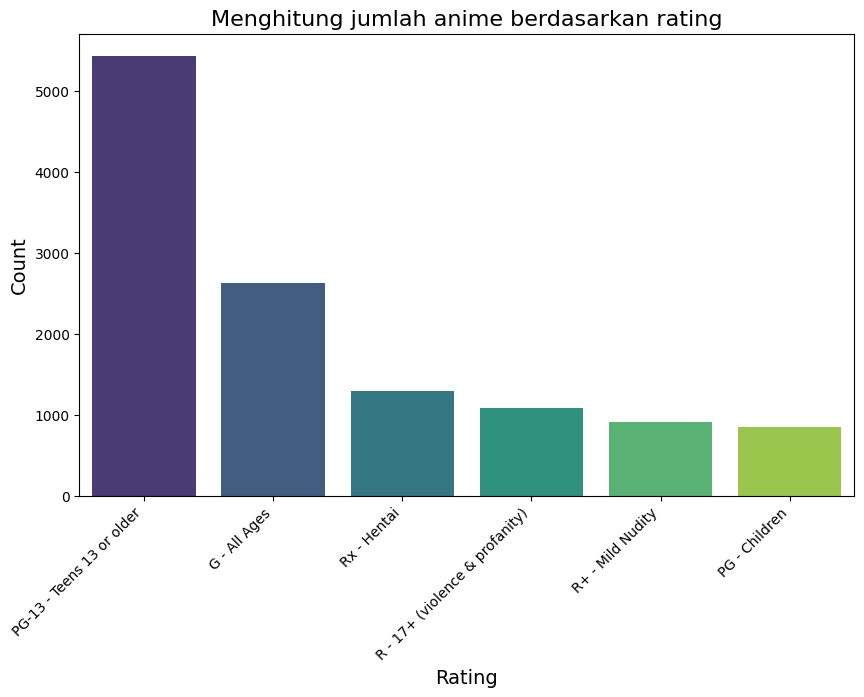

In [24]:
# Menghitung jumlah anime berdasarkan rating nya
rating_counts = data_anime_cleaned['Rating'].value_counts()
print(rating_counts)

# Bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=rating_counts.index, y=rating_counts.values, palette="viridis")
plt.title("Menghitung jumlah anime berdasarkan rating", fontsize=16)
plt.xlabel("Rating", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.show()

Dari data diatas, Rating dengan jumlah tertinggi adalah PG-13 dengan jumlah sebanyak 5435

### Korelasi score dengan rating anime

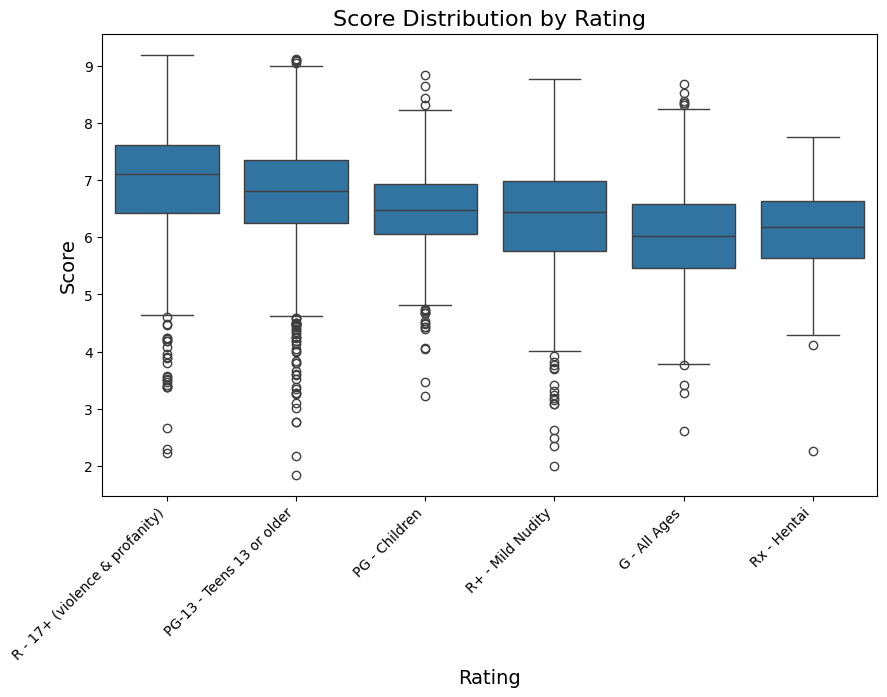

In [25]:
# Box plot to compare Scores by Rating
plt.figure(figsize=(10, 6))
sns.boxplot(data=data_anime_cleaned, x="Rating", y="Score")
plt.title("Score Distribution by Rating", fontsize=16)
plt.xlabel("Rating", fontsize=14)
plt.ylabel("Score", fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.show()


Dari gambar diatas dapat disimpulkan : 
* Score anime dengan rata - rata paling tinggi adalah anime dengan rating R-17+ dengan rata - rata 7.2, artinya anime dengan rating R lebih disukai
* Anime dengan score rata - rata yang paling kecil adalah anime dengan rating G - All Ages
* Anime dengan rating PG-13 memiliki penyebaran rating yang paling banyak, artinya anime dengan rating PG-13 memiliki perbedaan kualitas

### Analisis Genre

In [26]:
genres = []
genre_anime = data_anime_cleaned['Genres'].unique()
for genre in genre_anime:
    array_genre = genre.split(',')
    [genres.append(x) for x in array_genre if x not in genres]
print('Jumlah Genre : ',len(genres))

Jumlah Genre :  83


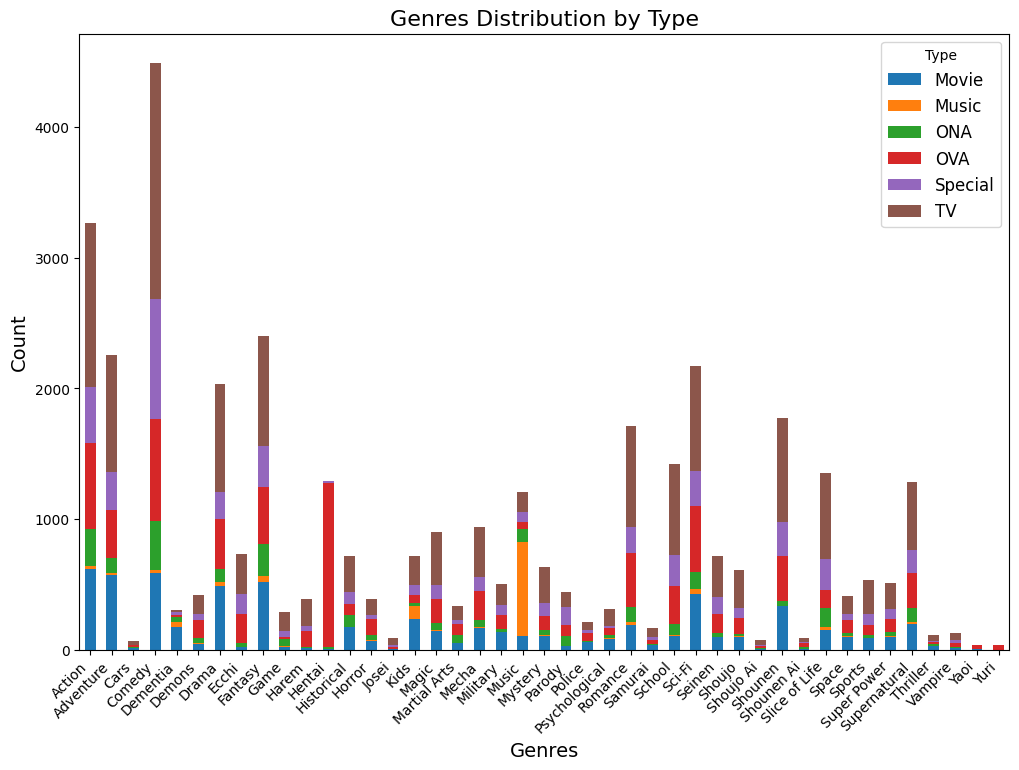

In [27]:
# One-hot encoding genres
genres_split = data_anime_cleaned['Genres'].str.get_dummies(sep=', ')
genres_split['Type'] = data_anime_cleaned['Type']

# Grouping genres berdasarkan Type
genre_counts = genres_split.groupby('Type').sum().T

# Stacked bar chart
genre_counts.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title("Genres Distribution by Type", fontsize=16)
plt.xlabel("Genres", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.legend(title="Type", fontsize=12)
plt.show()

/tmp/ipykernel_144928/290420302.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(genre_count.values()), y=list(genre_count.keys()), palette='muted')


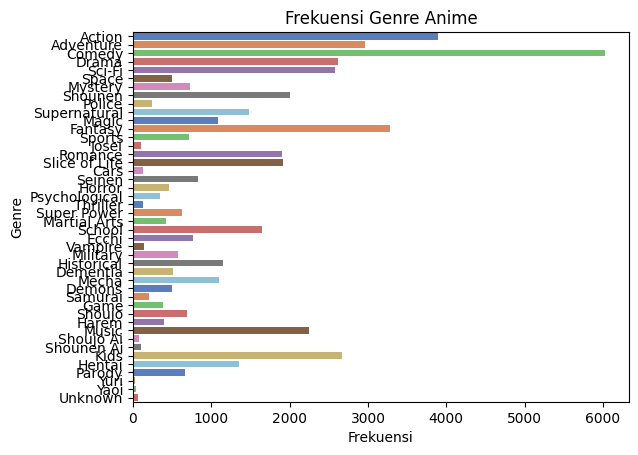

In [28]:
from collections import Counter

# Memisahkan genre
genre_list = data_eda['Genres'].str.split(', ').explode()
genre_count = Counter(genre_list)

# Visualisasi
sns.barplot(x=list(genre_count.values()), y=list(genre_count.keys()), palette='muted')
plt.title('Frekuensi Genre Anime')
plt.xlabel('Frekuensi')
plt.ylabel('Genre')
plt.show()

/tmp/ipykernel_144928/49978925.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


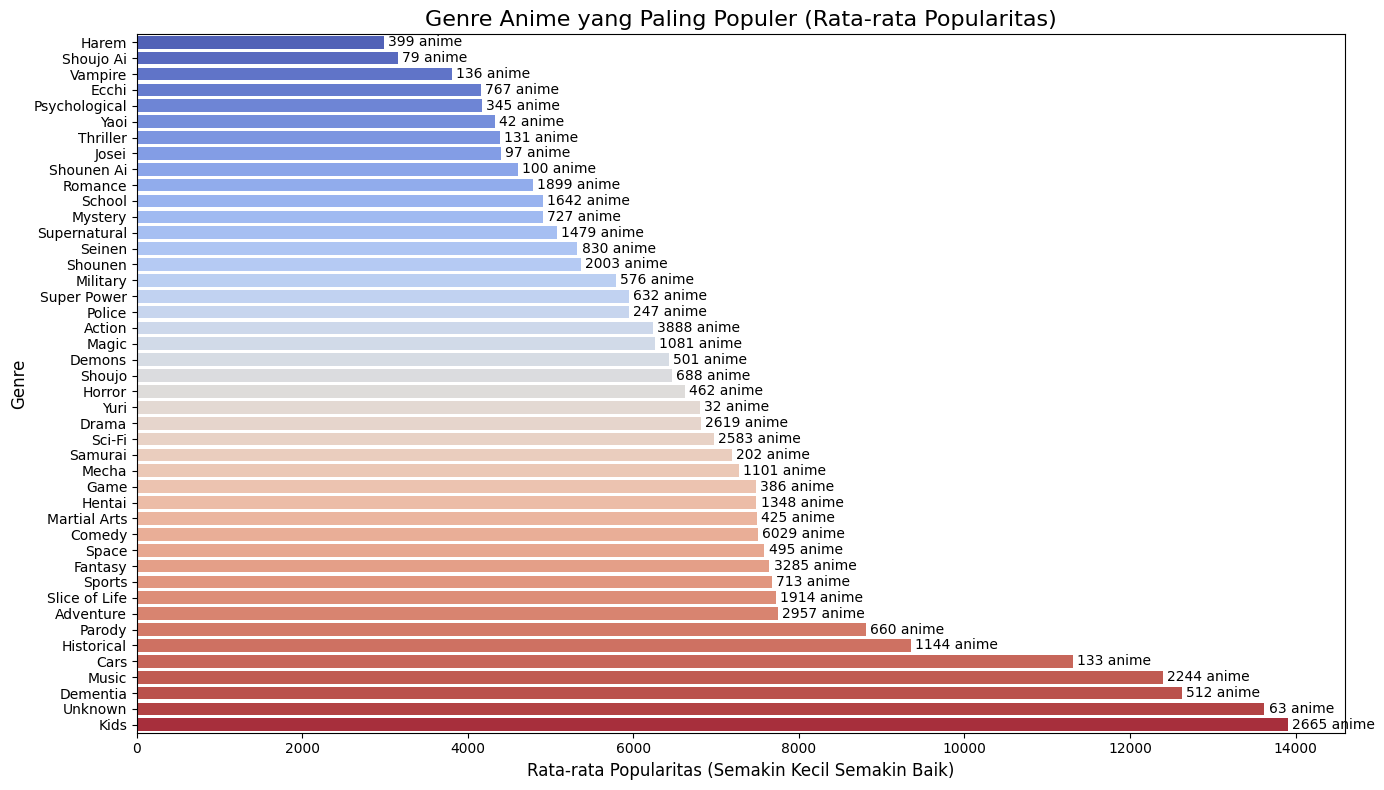

In [29]:
# Pisahkan genre menjadi daftar individual
genres_popularity = data_eda.assign(Genres=data_eda['Genres'].str.split(', ')).explode('Genres')

# Hitung rata-rata popularitas untuk setiap genre
genre_popularity = genres_popularity.groupby('Genres').agg(
    avg_popularity=('Popularity', 'mean'),
    anime_count=('Popularity', 'count')
).sort_values(by='avg_popularity', ascending=True)

# Visualisasi genre dengan rata-rata popularitas terendah
plt.figure(figsize=(14, 8))
sns.barplot(
    x=genre_popularity['avg_popularity'], 
    y=genre_popularity.index, 
    palette='coolwarm'
)
plt.title('Genre Anime yang Paling Populer (Rata-rata Popularitas)', fontsize=16)
plt.xlabel('Rata-rata Popularitas (Semakin Kecil Semakin Baik)', fontsize=12)
plt.ylabel('Genre', fontsize=12)

# Tambahkan anotasi jumlah anime
for i, count in enumerate(genre_popularity['anime_count']):
    plt.text(
        genre_popularity['avg_popularity'].iloc[i] + 50, 
        i, 
        f"{count} anime", 
        va='center', 
        fontsize=10, 
        color='black'
    )

plt.tight_layout()
plt.show()


Dari data diatas, dapat disimpulkan bahwa:
* Anime dengan genre komedi merupakan anime dengan jumlah yang paling banyak, yaitu 6029 anime
* Anime dengan genre harem memiliki rata - rata popularitas yang lebih tinggi meskipun memiliki jumlah anime yang lebih sedikit dari yang lainnya dengan jumlah sebanyak 399 anime
* Sedangkan anime dengan genre Kids memiliki rata - rata popularitas yang paling kecil

---

### Distribusi Anime Berdasarkan Tipe

Kategori tipe anime :  Type
TV         3761
OVA        2950
Movie      1977
Special    1734
ONA        1049
Music       727
Name: count, dtype: int64


/tmp/ipykernel_144928/1268217530.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=anime_type_counts.index, y=anime_type_counts.values, palette='viridis')


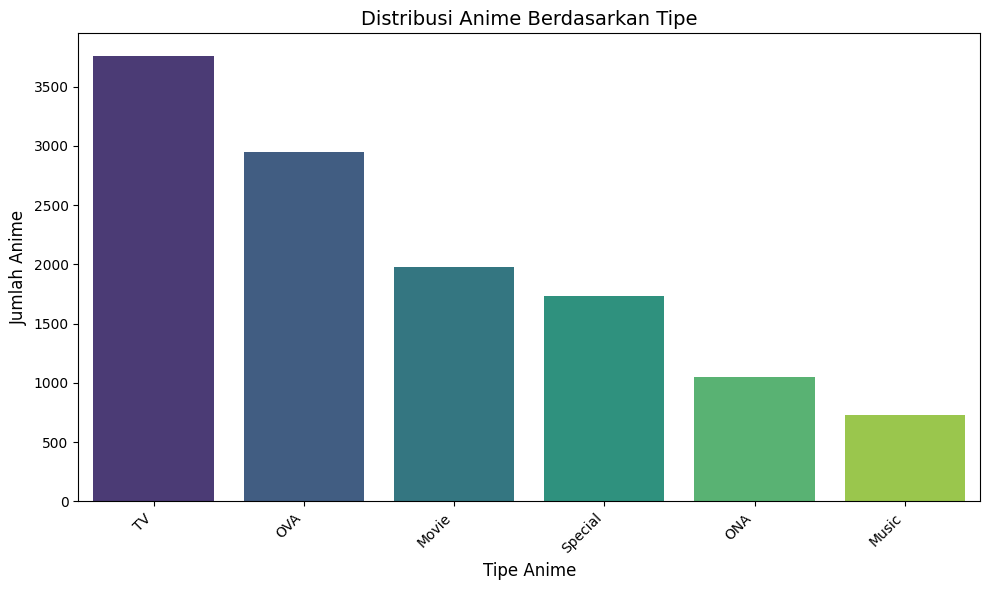

In [30]:
print('Kategori tipe anime : ',data_anime_cleaned['Type'].value_counts())

# Hitung jumlah anime berdasarkan tipe
anime_type_counts = data_anime_cleaned['Type'].value_counts()

# Visualisasi dengan barplot
plt.figure(figsize=(10, 6))
sns.barplot(x=anime_type_counts.index, y=anime_type_counts.values, palette='viridis')
plt.title('Distribusi Anime Berdasarkan Tipe', fontsize=14)
plt.xlabel('Tipe Anime', fontsize=12)
plt.ylabel('Jumlah Anime', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


Dari gambar diatas, dapat diketahui:
* Terdapat 6 tipe anime, yaitu TV, OVA, Movie, Special, ONA, Music
* Anime dengan tipe TV memiliki jumlah yang paling banyak, sebanyak 3761 anime

---

## Data Preparation

### Content Based Filtering

Untuk content-based filtering, kita akan fokus pada MAL_ID, Name, Score, Type, Episodes, Rating, Genres, dan sypnopsis

### Mengecek value kosong di data anime dengan sinopsis

In [31]:
anime_sinopsis

,MAL_ID,Name,Score,Genres,sypnopsis
0,1,Cowboy Bebop,8.78,"Action, Adventure, Comedy, Drama, Sci-Fi, Space","In the year 2071, humanity has colonized sever..."
1,5,Cowboy Bebop: Tengoku no Tobira,8.39,"Action, Drama, Mystery, Sci-Fi, Space","other day, another bounty—such is the life of ..."
2,6,Trigun,8.24,"Action, Sci-Fi, Adventure, Comedy, Drama, Shounen","Vash the Stampede is the man with a $$60,000,0..."
3,7,Witch Hunter Robin,7.27,"Action, Mystery, Police, Supernatural, Drama, ...",ches are individuals with special powers like ...
4,8,Bouken Ou Beet,6.98,"Adventure, Fantasy, Shounen, Supernatural",It is the dark century and the people are suff...
...,...,...,...,...,...
16209,48481,Daomu Biji Zhi Qinling Shen Shu,Unknown,"Adventure, Mystery, Supernatural",No synopsis information has been added to this...
16210,48483,Mieruko-chan,Unknown,"Comedy, Horror, Supernatural",ko is a typical high school student whose life...
16211,48488,Higurashi no Naku Koro ni Sotsu,Unknown,"Mystery, Dementia, Horror, Psychological, Supe...",Sequel to Higurashi no Naku Koro ni Gou .
16212,48491,Yama no Susume: Next Summit,Unknown,"Adventure, Slice of Life, Comedy",New Yama no Susume anime.


In [32]:
anime_sinopsis.isna().sum()

MAL_ID       0
Name         0
Score        0
Genres       0
sypnopsis    8
dtype: int64

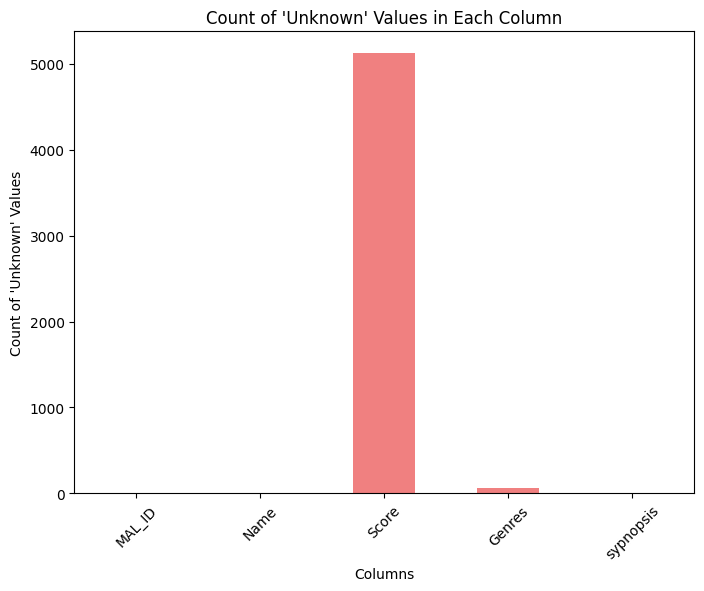

Total 'Unknown' values in the DataFrame: 5186


In [33]:
# Menghitung value 'Unknown' di setiap kolom
unknown_counts_per_column = anime_sinopsis.isin(['Unknown']).sum()

# Visualize dengan a bar chart
plt.figure(figsize=(8, 6))
unknown_counts_per_column.plot(kind='bar', color='lightcoral')
plt.title("Count of 'Unknown' Values in Each Column")
plt.xlabel("Columns")
plt.ylabel("Count of 'Unknown' Values")
plt.xticks(rotation=45)
plt.show()

# Also, count the total 'Unknown' values in the entire DataFrame
total_unknown_count = unknown_counts_per_column.sum()
print(f"Total 'Unknown' values in the DataFrame: {total_unknown_count}")

Karena sinopsis tidak ada yang bernilai 'Unknown' maka di abaikan

### Drop Value Kosong pada data sinopsis

In [34]:
anime_sinopsis_cleaned = anime_sinopsis.copy().dropna()

In [35]:
data_anime_cleaned_copy = data_anime_cleaned.copy()

### Merge data sinopsis ke dalam data anime general berdasarkan MAL_ID

In [36]:
# Merge ke dua dataframe dengan menggunakan 'MAL_ID'
merged_df = pd.merge(data_anime_cleaned_copy, anime_sinopsis_cleaned[['MAL_ID','sypnopsis']], on='MAL_ID', how='left')

In [37]:
merged_df[merged_df['sypnopsis'].isna()]

,MAL_ID,Name,Score,Type,Episodes,Rating,Genres,sypnopsis
164,188,Gosenzo San'e,6.11,OVA,4,Rx - Hentai,"Comedy, Hentai, Mystery, Supernatural",NaN
179,203,Words Worth,6.75,OVA,5,Rx - Hentai,"Adventure, Hentai, Demons, Magic, Fantasy",NaN
187,211,Pure Mail,6.26,OVA,2,Rx - Hentai,Hentai,NaN
189,213,Pia Carrot e Youkoso!!,6.02,OVA,3,Rx - Hentai,"Comedy, Romance, Hentai",NaN
190,214,Pia Carrot e Youkoso!! 2,6.15,OVA,3,Rx - Hentai,"Comedy, Romance, Hentai",NaN
...,...,...,...,...,...,...,...,...
12161,43465,Ijirare: Fukushuu Saimin,7.34,OVA,4,Rx - Hentai,"Hentai, School",NaN
12162,43466,Himawari wa Yoru ni Saku,6.49,OVA,1,Rx - Hentai,Hentai,NaN
12163,43467,Ajisai no Chiru Koro ni OVA,6.34,OVA,1,Rx - Hentai,Hentai,NaN
12181,44192,Kimi ga Suki. The Animation,6.83,OVA,2,Rx - Hentai,Hentai,NaN


In [38]:
merged_df.fillna('', inplace=True)

In [39]:
merged_df.isna().sum()

MAL_ID       0
Name         0
Score        0
Type         0
Episodes     0
Rating       0
Genres       0
sypnopsis    0
dtype: int64

In [40]:
data_anime_cleaned = merged_df

In [41]:
data_anime_cleaned.shape

(12198, 8)

---

In [42]:
# Inisialisasi TfidfVectorizer
tf = TfidfVectorizer()

Mentranformasikan data Genre dan sinopsis ke bentuk matrix dengan menggunakan tfidfVectorizer()

In [43]:
# TF-IDF untuk Genres
tfidf_matrix = tf.fit_transform(data_anime_cleaned["Genres"])

# Menyimpan feature name dari Genres
genres_features = tf.get_feature_names_out()

# TF-IDF untuk synopsis (fill missing value demgan empty strings)
tfidf_matrix2 = tf.fit_transform(data_anime_cleaned["sypnopsis"].fillna(''))

# Menyimpan feature name dari sypnopsis
synopsis_features = tf.get_feature_names_out()

# Combine feature name dari kedua fitur
combined_features = list(genres_features) + list(synopsis_features)

menggabungkan matriks genre dengan matriks sinopsis menjadi 1

In [44]:
# Combine ke dalam 1 matrix
final_features = hstack([tfidf_matrix, tfidf_matrix2])

In [45]:
# Membentuk tabel dari judul lagu beserta genrenya berdasarkan tfidf
pd.DataFrame(
    final_features.todense(),
    columns = combined_features,
    index = data_anime_cleaned['Name']
)

,action,adventure,ai,arts,cars,comedy,dementia,demons,drama,ecchi,...,赤猫,道原かつみ,鎮座dopeness,闘龍極意書,鶺鴒余暇,鶺鴒診断,麻城ゆう,黄色いしあわせ,박사,카프
Name,,,,,,,,,,,,,,,,,,,,,
Cowboy Bebop,0.303065,0.351348,0.0,0.0,0.0,0.261348,0.0,0.0,0.365082,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Cowboy Bebop: Tengoku no Tobira,0.292247,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.352051,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Trigun,0.336218,0.389783,0.0,0.0,0.0,0.289938,0.0,0.0,0.405019,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Witch Hunter Robin,0.262418,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.316118,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Bouken Ou Beet,0.000000,0.468201,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Kimetsu Gakuen: Valentine-hen,0.000000,0.000000,0.0,0.0,0.0,1.000000,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Heikousen,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Nu Wushen de Canzhuo Spring Festival Special,0.000000,0.000000,0.0,0.0,0.0,0.339197,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Modelling

Menggunakan cosine similarity untuk mencari kemiripan anime

In [46]:
# Cosine Similarity
cosine_sim = cosine_similarity(final_features)

Setelah itu, akan dibuat tabel berisi cosine similarity antar anime.

In [47]:
# Membuat dataframe dari variabel cosine_sim dengan baris dan kolom berupa judul anime
cosine_sim_df = pd.DataFrame(cosine_sim, index = data_anime_cleaned["Name"], columns = data_anime_cleaned["Name"])
print('Shape:', cosine_sim_df.shape)

# Melihat similarity matrix pada setiap anime
cosine_sim_df.sample(10, axis = 1).sample(10, axis = 0)

Shape: (12198, 12198)


Name,Hetalia: The Beautiful World,Palme no Ki,Kemurikusa (2018),Home My Home,Penguin Highway,MILPOM★ Pilot,Zettai Shounen,Shaman King Specials,Major S3,Senkou no Night Raid
Name,,,,,,,,,,
Tales of Symphonia The Animation: Sekai Tougou-hen Specials,0.173413,0.006957,0.004889,0.000000,0.008152,0.236028,0.018962,0.235483,0.008697,0.015040
Youkai Watch Movie 3: Soratobu Kujira to Double Sekai no Daibouken da Nyan!,0.060488,0.000000,0.000000,0.268300,0.000000,0.084531,0.000000,0.253205,0.000000,0.000000
Riding Bean,0.001388,0.029014,0.014177,0.000000,0.020665,0.014445,0.029702,0.068502,0.021548,0.054591
Servamp,0.037894,0.113207,0.021619,0.000000,0.057059,0.060532,0.094041,0.227076,0.123090,0.062595
Tarzan,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Doraemon: Benkyou Heya no Tsuribori,0.060621,0.020581,0.278393,0.224342,0.271114,0.078342,0.271511,0.208879,0.132222,0.030459
Memories Off #5 Togireta Film The Animation,0.006955,0.410730,0.015596,0.000000,0.044356,0.012246,0.152292,0.030286,0.212773,0.023500
Urusei Yatsura Movie 5: Kanketsu-hen,0.060481,0.350034,0.256119,0.000000,0.286638,0.078250,0.265275,0.164875,0.142182,0.093499
Ace wo Nerae!: Final Stage,0.003085,0.136601,0.008325,0.000000,0.027679,0.004858,0.101067,0.103454,0.401085,0.070510


Setelah dibentuk tabel cosine similarity, selanjutnya akan dibuat fungsi untuk menentukan rekomendasi musik berdasarkan content-based filtering.

---

### Pengujian Sistem Rekomendasi

deklarasi dataframe yang akan dijadikan output

In [48]:
# Dataframe yang akan dijadikan output top - n recommendation
data_output = data_anime_cleaned[['MAL_ID','Name', 'Score', 'Type', 'Episodes', 'Rating', 'Genres', 'sypnopsis']].copy()

In [49]:
# Fungsi untuk mendapatkan rekomendasi top N berdasarkan judul anime

def get_top_n_recommendations_by_name(anime_name, n=10):
    # Mendapatkan index anime dari judul anime
    idx = data_anime_cleaned[data_anime_cleaned['Name'] == anime_name].index[0]
    
    # Mendapatkan similarity score dari judul anime
    sim_scores = list(enumerate(cosine_sim[idx]))
    
    # Sorting anime berdasarkan similarity score secara descending
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    
    # Mendapatkan top n anime, tanpa memasukkan judul yang di input
    sim_scores = sim_scores[1:n+1]
    
    # Mendapatkan index dari anime dan similarity score nya
    anime_indices = [i[0] for i in sim_scores]
    similarity_scores = [i[1] for i in sim_scores]
    
    # Mendapatkan full data anime berdasarkan data_output
    recommended_animes = data_output.iloc[anime_indices]
    
    # Menambahkan kolom nilai similarity score
    recommended_animes['similarity_score'] = similarity_scores
    
    return recommended_animes.reset_index().drop(columns='index')

In [50]:
# Inferensi top 10 reccomendation
anime_name_to_infer = "Darling in the FranXX" 
top_recommendations = get_top_n_recommendations_by_name(anime_name=anime_name_to_infer, n=10)
print("Top 10 Recommendations with Full Anime Data:")
top_recommendations

Top 10 Recommendations with Full Anime Data:


,MAL_ID,Name,Score,Type,Episodes,Rating,Genres,sypnopsis,similarity_score
0,2795,Dragonaut: The Resonance,6.65,TV,25,R+ - Mild Nudity,"Action, Drama, Fantasy, Mecha, Romance, Sci-Fi","Twenty years prior to the story's beginning, a...",0.541468
1,1682,Baldr Force Exe Resolution,6.47,OVA,4,R+ - Mild Nudity,"Action, Drama, Mecha, Sci-Fi","ork runs all over the world, and the developme...",0.524880
2,30382,Aquarion Logos,5.72,TV,26,PG-13 - Teens 13 or older,"Action, Comedy, Drama, Fantasy, Mecha, Romance...","For thousands of years after its development, ...",0.520472
3,878,Zegapain,7.35,TV,26,PG-13 - Teens 13 or older,"Action, Mecha, Romance, Sci-Fi",verage high school student Kyou Sogoru is an a...,0.512521
4,10447,Aquarion Evol,7.14,TV,26,PG-13 - Teens 13 or older,"Action, Comedy, Drama, Fantasy, Mecha, Romance...","12,000 years after the events in Genesis Aquar...",0.512519
5,237,Koukyoushihen Eureka Seven,8.09,TV,50,PG-13 - Teens 13 or older,"Adventure, Drama, Mecha, Romance, Sci-Fi",In the backwater town of Bellforest lives a 14...,0.507139
6,6087,Jetter Mars,6.22,TV,27,G - All Ages,"Action, Drama, Mecha, Sci-Fi","In 2015 A.D., Dr. Yamanoue, the Secretary of t...",0.503997
7,2298,Mobile Suit Gundam SEED: After-Phase Between t...,7.06,Special,1,PG-13 - Teens 13 or older,"Action, Drama, Mecha, Sci-Fi",s the war between ZAFT's Coordinators and Eart...,0.503533
8,4503,Choujikuu Kidan Southern Cross,6.58,TV,23,R+ - Mild Nudity,"Action, Sci-Fi, Drama, Mecha","By the year 2120, humans have successfully col...",0.500394
9,548,Wonderful Days,7.04,Movie,1,PG-13 - Teens 13 or older,"Action, Drama, Romance, Sci-Fi","Set in 2142, Wonderful Days depicts a world th...",0.499573


## Evaluasi

Pada proyek ini, metrik evaluasi yang digunakan adalah precision. Precision mengukur seberapa akurat rekomendasi yang diberikan oleh sistem, yaitu proporsi dari item yang direkomendasikan yang benar-benar relevan. Dalam konteks sistem rekomendasi berbasis konten untuk anime, precision menunjukkan seberapa banyak anime yang direkomendasikan kepada pengguna yang sesuai dengan preferensi atau minat mereka.

---

Fungsi untuk evaluasi, jika similarity score diatas 0.5 maka akan dianggap relevan, kemudian di lakukan perhitungan dari total_item_relevan/total_item_yang_direkomendasikan untuk menghitung precission nya

In [51]:
def evaluasi(top_recommendations, n=10):
    count = 0
    for score in top_recommendations['similarity_score']:
        if score > 0.5:
                count+=1
    precission = (count / n)
    # print(f'Precission : {precission} ({precission*100}%)')
    return precission

Melakukan evaluasi terhadap 5 judul anime kemudian di rata - rata untuk melihat hasil akhir nya

In [52]:
data_akhir = []

anime_names = ['Gintama', 'Naruto', 'Bleach', 'Log Horizon: Entaku Houkai', 'Majo no Tabitabi'] 

for judul in anime_names:
    top_recommendations = get_top_n_recommendations_by_name(anime_name=judul, n=10)
    precission = evaluasi(top_recommendations, 10)
    print("Top 10 Recommendations : ", judul)
    print('Precission : ', precission)
    # top_recommendations
    data_akhir.append(precission)

x = 0
for i in data_akhir:
    x+=i


print('Rata - rata  Precission dari 5 Judul: ', x/len(data_akhir))

Top 10 Recommendations :  Gintama
Precission :  1.0
Top 10 Recommendations :  Naruto
Precission :  1.0
Top 10 Recommendations :  Bleach
Precission :  1.0
Top 10 Recommendations :  Log Horizon: Entaku Houkai
Precission :  0.3
Top 10 Recommendations :  Majo no Tabitabi
Precission :  1.0
Rata - rata  Precission dari 5 Judul:  0.86


Dari data diatas didapatkan rata - rata nilai precission adalah 0.86 yang bisa dibilang cukup bagus, namun nilai tersebut akan berubah-ubah tergantung dengan preferensi dari user.

## Kesimpulan

---

1. Genre komedi merupakan genre yang paling favorit di kalangan penggemar anime, dibuktikan dengan memiliki jumlah anime terbanyak yaitu 6029 anime, meskipun genre ini memiliki variasi popularitas yang lebih rendah dibandingkan genre lainnya.
2. Anime Fullmetal Alchemist: Brotherhood merupakan anime paling ikonik di kalangan penggemar, dibuktikan dengan memiliki nilai Favorites tertinggi, meskipun anime Death Note lebih populer di tahun 2020.

3. Terdapat beberapa variabel yang berkorelasi, yaitu sebagai berikut:

    * Variabel genre dan popularitas:

        * Genre harem berkorelasi positif yang cukup kuat terhadap popularitas. Meskipun memiliki jumlah anime yang lebih sedikit (399 anime), anime dengan genre ini memiliki rata-rata popularitas yang lebih tinggi, menunjukkan bahwa genre ini lebih disukai oleh kalangan tertentu.
        
        * Sebaliknya, genre kids berkorelasi negatif dengan popularitas karena anime dengan genre ini memiliki rata-rata popularitas yang lebih rendah dibandingkan genre lainnya.
    * Variabel rating dan skor:

        * Variabel rating berkorelasi positif yang kuat terhadap score anime. Anime dengan rating R-17+ memiliki rata-rata skor tertinggi (7.2), menunjukkan bahwa anime dengan rating ini lebih disukai dan mendapatkan lebih banyak apresiasi.
        * Sebaliknya, anime dengan rating G - All Ages berkorelasi negatif dengan skor, karena anime dengan rating ini memiliki rata-rata skor yang lebih rendah, menandakan bahwa anime untuk semua usia cenderung kurang disukai secara umum.
    * Variabel tipe anime dan jumlah anime:

        * Tipe anime TV berkorelasi positif dengan jumlah anime terbanyak (3761 anime), menandakan bahwa format serial televisi menjadi pilihan utama dalam produksi anime.

4. Sistem rekomendasi anime dapat diimplementasikan dengan menggunakan pendekatan Content-based filtering menggunakan cosine similarity untuk memberikan rekomendasi berdasarkan preferensi pengguna.

### Referensi

---

[1] Grand View Research, "Anime Market Size, Share & Trends Analysis Report By Type (T.V., Movie, Video, Internet Distribution), By Genre, By Demographics, By Region, And Segment Forecasts, 2024 - 2030," 2023. [Online]. Available: https://www.grandviewresearch.com/industry-analysis/anime-market.

[2] R. Burke, "Hybrid recommender systems: Survey and experiments," User Modeling and User-Adapted Interaction, vol. 12, no. 4, pp. 331–370, Nov. 2002, doi: 10.1023/A:1021240730564.

[3] M. Pazzani and D. Billsus, "Content-based recommendation systems," in The Adaptive Web: Methods and Strategies of Web Personalization, Berlin, Heidelberg: Springer, 2007, pp. 325–341, doi: 10.1007/978-3-540-72079-9_10.

[4] X. Su and T. M. Khoshgoftaar, "A survey of collaborative filtering techniques," Advances in Artificial Intelligence, vol. 2009, pp. 1–19, 2009, doi: 10.1155/2009/421425.